2023 Bart Smeets

# Power Measurement - Read Scope

This code aims to read the data of a power measurement with the oscilloscope (Tektronix MDO3022)

In [1]:
# Python standard library
from datetime import datetime
import tkinter as tk
from tkinter import filedialog
import os

# Required
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load data

In [2]:
# Set working directory
INITIAL_PATH = os.environ.get('THESIS_DATA')

# Create window for file selection
root = tk.Tk()
root.withdraw()
root.attributes('-topmost', True)
FILE_DIRECTORY = filedialog.askopenfilename(initialdir=INITIAL_PATH, title='Select Power Data')
root.destroy()

# Set work directory
index = FILE_DIRECTORY.rfind('/')
DIRECTORY  = FILE_DIRECTORY[:index]
FILE_NAME = FILE_DIRECTORY[index+1:]
os.chdir(DIRECTORY)

# Load data
measurement = pd.read_csv(FILE_DIRECTORY,header=None, skiprows=21,delimiter=',')
MEASUREMENT = measurement.to_numpy()

## Calculate energy and power

In [3]:
# Set laser and meter constants
CONVERSION_RATE = 392.74    # Unit V/J
FREQUENCY = 10    # Unit Hz
PULSE_WIDTH = 6e-9 # 5-8 ns

# Find delta (difference between maximum and baseline)
## Find maximum
MAXIMUM = np.amax(MEASUREMENT[:,1])
## Find baseline
indices = np.where(MEASUREMENT[:,0] < 0)    # Baseline indices
BASELINE = np.average(MEASUREMENT[indices, 1])    # Calculate baseline value
## Calculate difference
DELTA = MAXIMUM - BASELINE

# Calculate corresponding energy and power
ENERGY = DELTA / CONVERSION_RATE
POWER = ENERGY / PULSE_WIDTH

# Print Results
OUTPUT_STRING = textstr = '\n'.join((
    r'Delta V = %.2f mV' % (DELTA*1e3, ),
    r'Pulse Energy = %.2f uJ' % (ENERGY*1e6, ),
    r'Peak Power = %.2f W' % (POWER, )))
print(OUTPUT_STRING)

Delta V = 1.88 mV
Pulse Energy = 4.79 uJ
Peak Power = 798.12 W


### Plot results

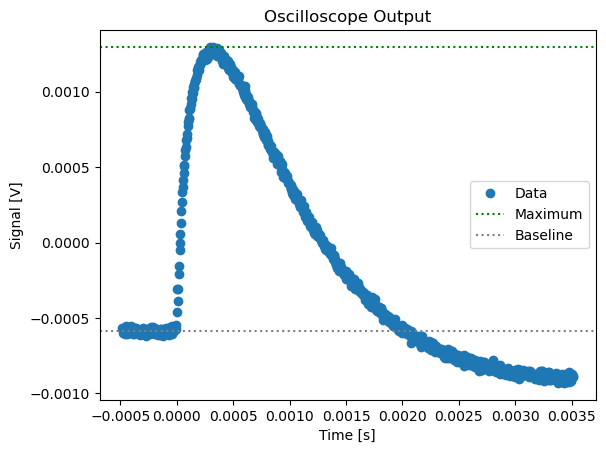

In [4]:
fig = plt.figure()

## Plot data
plt.plot(MEASUREMENT[:,0], MEASUREMENT[:,1], 'o', label='Data')    # Data
plt.axhline(MAXIMUM, ls=':', color='green', label='Maximum')    # Maximum
plt.axhline(BASELINE, ls=':', color='grey', label='Baseline')    # Baseline
## Labels
plt.ylabel('Signal [V]')
plt.xlabel('Time [s]')
plt.title('Oscilloscope Output')
plt.legend()

plt.show()

## Export Results

In [5]:
# Define file names
timeCode = datetime.now()
OUTPUT_FILENAME = FILE_NAME[:-4]
OUTPUT_DIRECTORY = DIRECTORY + '/OUTPUT_POWER_' + OUTPUT_FILENAME + '_' + timeCode.strftime("%Y%m%d-%H%M")
os.mkdir(OUTPUT_DIRECTORY)
os.chdir(OUTPUT_DIRECTORY)


# Save figure
fig.savefig('OUTPUT_' + OUTPUT_FILENAME + '.png', bbox_inches='tight')

# Write file
output_file = open('OUTPUT_' + OUTPUT_FILENAME + '.txt', 'wt')
output_file.write(OUTPUT_STRING)
output_file.close()

# Open output folder
os.startfile(OUTPUT_DIRECTORY)